In [22]:
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import random
from IPython.display import display
import os
from dotenv import load_dotenv

load_dotenv()

# Initialize client
client = genai.Client(api_key=os.getenv("OLD_GEMINI_API_KEY"))


In [23]:
# Block 2: Updated Text Prompt Generation Function
def generate_text_prompt(client, user_prompt):
    """Generates an enhanced text prompt using Gemini."""
    # Updated instructions for Gemini, aiming for a meditative scene from correct POV
    gemini_instruction = f"""
    REQUIRED: The perspective is an **eye-level view from a seated position in the center of the scene, looking forward with a standard camera perspective (no wide-angle distortion)**. NOT AN OVERHEAD SHOT OR A DISTANT SHOT. DO NOT INCLUDE ANY PEOPLE INSIDE OF THE IMAGE. do not include asterisks in your prompt or any colons, just normal characters.

    Refine and enhance the following user-provided scene description to create a highly detailed, **photorealistic rendering of a fantastical and evocative landscape** suitable for Imagen 3. The goal is a scene that feels both **magical/otherworldly and deeply meditative**. Make the middle of the scene a vast, open relaxing area where a person could sit and meditate BUT DONT PLACE A PERSON THERE. REQUIRED: The scene must **maintain this eye-level, seated perspective looking forward**.

    Focus on elements that will create a rich, immersive, **fantastical**, and meditative experience:
    * **Lighting:** Describe specific natural or **unnatural/magical** lighting that enhances the fantasy mood, like 'bioluminescent glow from plants', 'soft ethereal light filtering through crystalline structures', 'twin suns setting casting long, strange shadows', 'warm golden hour light illuminating floating particles'.
    * **Atmosphere:** Emphasize serenity, peace, tranquility, zen, **combined with a palpable sense of wonder or magic**. Use terms like 'serene atmosphere', 'air filled with softly glowing motes', 'gentle iridescent mist swirling around impossible rock formations', 'perfectly still air under a strangely colored sky (e.g., lavender, soft teal)'.
    * **Fantastical Elements:** Weave in unique, imaginative features naturally into the landscape. Examples: 'floating islands in the near or far distance', 'glowing flora or fungi', 'waterfalls flowing upwards or made of light', 'trees made of crystal or woven light', 'impossible gravity-defying rock formations', 'subtle auroras visible during the day'. These elements should contribute to the scene's beauty and tranquility.
    * **Sensory Details (Visual):** Describe colors (consider unusual but harmonious palettes), textures (e.g., 'smooth iridescent obsidian rocks', 'soft moss that faintly glows', 'gentle ripples on shimmering, unnaturally clear water'), and depth, grounding the fantasy in realistic detail.
    * **Style & Quality:** Aim for **'photorealistic'**, 'highly detailed', '8k resolution', 'sharp focus', 'cinematic lighting'. The fantasy elements should look *believably real* within the context of the scene, as if captured by a high-end camera.

    Ensure the prompt is specific, avoids ambiguity, and ONLY contains the prompt text itself. DO NOT add explanations or introductory phrases like "Here's your prompt:".

    User's Initial Scene: {user_prompt}
    """
    try:
        # Using the exact model from your original code
        response = client.models.generate_content(
            model="gemini-2.0-flash",
            contents=[gemini_instruction]
        )
        # Assuming response.text works as in your original code
        return response.text.strip()
    except Exception as e:
        print(f"Error generating text prompt: {e}")
        return None

In [24]:
# Block 3: Image Generation Function (As per your working code)
def generate_image(client, image_prompt):
    """Generates an image using Imagen and returns the response."""
    try:
        # Using the exact model and config from your original code
        image_response = client.models.generate_images(
            model='imagen-3.0-generate-002',
            prompt=image_prompt,
            config=types.GenerateImagesConfig( # Assuming 'types' is imported correctly
                number_of_images=1,
                aspect_ratio='16:9',
                personGeneration="DONT_ALLOW",
            )
        )
        return image_response
    except Exception as e:
        print(f"Error generating image: {e}")
        import traceback
        traceback.print_exc()
        return None

In [25]:
# Block 4: Save and Display Function (As per your working code)
def save_and_display_image(image_response, filename="generated_image.png"):
    """Saves and displays the generated image."""
    if hasattr(image_response, 'generated_images') and image_response.generated_images:
        print(f"Number of generated images: {len(image_response.generated_images)}")
        generated_image = image_response.generated_images[0]

        if hasattr(generated_image, 'image') and hasattr(generated_image.image, 'image_bytes'):
            image_bytes = generated_image.image.image_bytes
            image = Image.open(BytesIO(image_bytes))
            image.save(filename)
            print(f"Image saved successfully as '{filename}'")
            display(Image.open(filename))
            # image.show() # Uncomment if you prefer opening in default viewer
            return True
        else:
            print("Image object does not have expected 'image' or 'image_bytes' attributes")
    else:
        print("No generated images found in response")
        print("Full response:", image_response)
    return False

In [26]:
# Block 5: Streamlined Workflow Execution (No enhance_prompt function call)
user_prompt = "floating sky island nature"

# 1. Generate text prompt using the refined instructions in generate_text_prompt
print("Generating enhanced text prompt...")
image_prompt = generate_text_prompt(client, user_prompt) # Use the enhanced prompt directly
image_prompt

    

Generating enhanced text prompt...


'Eye-level view from a seated position, looking forward. A vast, open, meditative space dominates the center of the scene. Before me stretches a field of luminescent moss, its soft emerald glow pulsating gently. In the mid-ground, crystalline trees sprout from the moss, their branches reaching towards a lavender sky. Each branch refracts the light of twin setting suns, casting long, attenuated, and subtly rainbow-tinged shadows across the mossy field. The twin suns are a pale orange and a soft rose color, creating a warm and otherworldly glow. Floating islands drift serenely in the distance, their undersides covered in waterfalls of shimmering light that cascade downwards, never reaching the ground. These islands are draped in hanging gardens of luminous purple flowers. The air is perfectly still, filled with softly glowing golden motes, like suspended fireflies. Impossible gravity-defying rock formations rise in the near distance, crafted from smooth iridescent obsidian, reflecting th


Generating image...
Number of generated images: 1
Image saved successfully as 'generated_image.png'


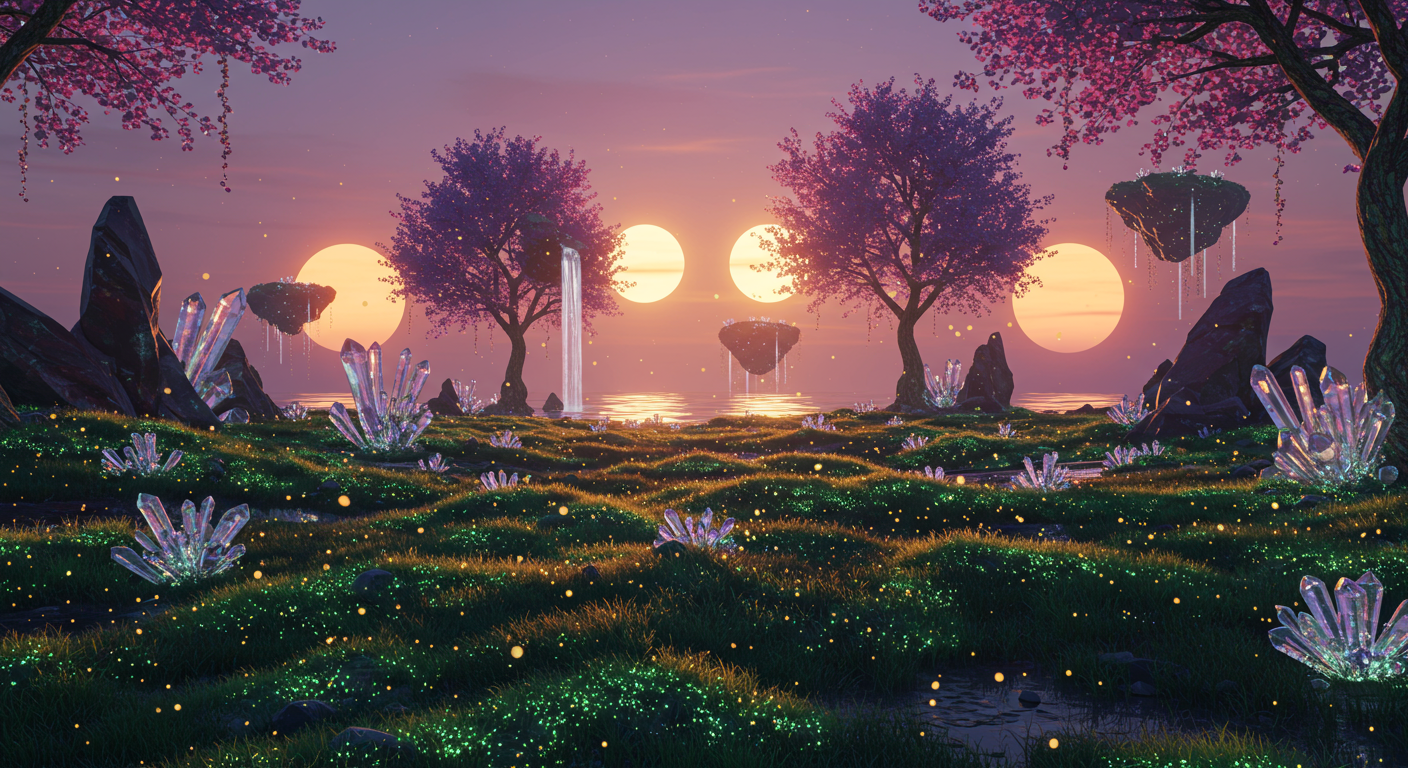

In [27]:
# 2. Generate image using the prompt from generate_text_prompt
print("\nGenerating image...")
image_response = generate_image(client, image_prompt)

if image_response:
    # 3. Save and display the image
    save_and_display_image(image_response)
else:
    print("Image generation failed.")
